In [ ]:
import pandas as pd

df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.info()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

np.int64(0)

In [ ]:
df['Attrition'].value_counts(normalize=True)


,proportion
Attrition,
No,0.838776
Yes,0.161224


In [ ]:
df[['Age','Department','MonthlyIncome','OverTime','JobSatisfaction','WorkLifeBalance','YearsAtCompany','YearsSinceLastPromotion','Attrition']].head()


,Age,Department,MonthlyIncome,OverTime,JobSatisfaction,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,Attrition
0,41,Sales,5993,Yes,4,1,6,0,Yes
1,49,Research & Development,5130,No,2,3,10,1,No
2,37,Research & Development,2090,Yes,3,3,0,0,Yes
3,33,Research & Development,2909,Yes,3,3,8,3,No
4,27,Research & Development,3468,No,2,3,2,2,No


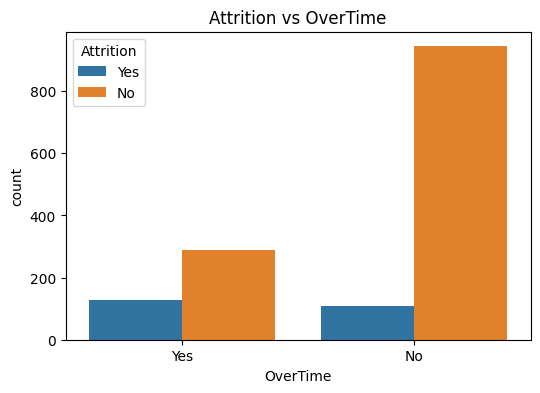

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="OverTime", hue="Attrition")
plt.title("Attrition vs OverTime")
plt.show()


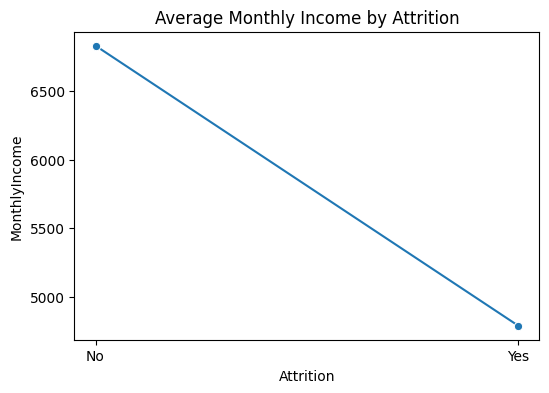

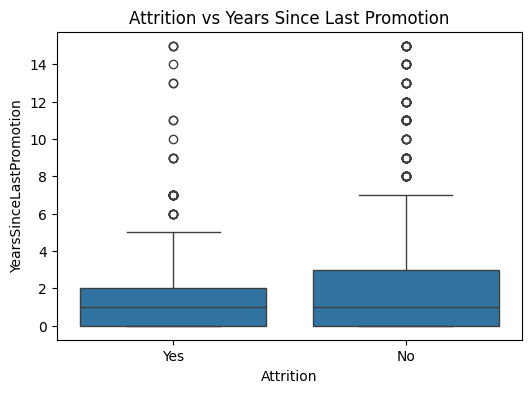

In [ ]:
income_attrition = df.groupby("Attrition")["MonthlyIncome"].mean().reset_index()

plt.figure(figsize=(6,4))
sns.lineplot(data=income_attrition, x="Attrition", y="MonthlyIncome", marker="o")
plt.title("Average Monthly Income by Attrition")
plt.show()

# not a strong reason
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Attrition", y="YearsSinceLastPromotion")
plt.title("Attrition vs Years Since Last Promotion")
plt.show()


In [ ]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['OverTime'] = le.fit_transform(df['OverTime'])
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField',
                                 'Gender', 'JobRole', 'MaritalStatus'], drop_first=True)


In [ ]:
selected_features = ['MonthlyIncome', 'Age', 'TotalWorkingYears', 'YearsAtCompany',
                     'OverTime', 'YearsWithCurrManager', 'NumCompaniesWorked',
                     'PercentSalaryHike', 'EnvironmentSatisfaction', 'TrainingTimesLastYear']
X_final = df[selected_features]
y_final = df['Attrition']


TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
logreg.fit(X_train_res, y_train_res)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[173  74]
 [ 15  32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.70      0.80       247
           1       0.30      0.68      0.42        47

    accuracy                           0.70       294
   macro avg       0.61      0.69      0.61       294
weighted avg       0.82      0.70      0.74       294

ROC AUC: 0.7546730984580929


In [ ]:
df['PredictedAttrition'] = logreg.predict(X_final)
df['PredictedAttrition'] = df['PredictedAttrition'].map({1: 'Yes', 0: 'No'})


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X_final.columns,
    'Importance': logreg.coef_[0]
}).sort_values(by='Importance', ascending=False)
feature_importance.head(10)


,Feature,Importance
4,OverTime,1.381247
3,YearsAtCompany,0.079131
6,NumCompaniesWorked,0.075692
0,MonthlyIncome,-0.000010
1,Age,-0.026770
7,PercentSalaryHike,-0.040076
2,TotalWorkingYears,-0.072415
5,YearsWithCurrManager,-0.216320
9,TrainingTimesLastYear,-0.256286
8,EnvironmentSatisfaction,-0.595326


# Business Recommendations

1. Reduce OverTime for employees identified as High Risk Attrition.
2. Improve Monthly Income for employees at risk of leaving.
3. Provide Career Path and promotion opportunities for employees with long YearsSinceLastPromotion.
